Load in the transactions data

In [1]:
# Import Libraries
import pandas as pd
import math
# Load in json data
df = pd.read_json('transactions.json')
print(df.head(10))

                                   Name Notification Date  \
0           Collins, Susan M. (Senator)        12/23/2021   
1               Hagerty, Bill (Senator)        12/22/2021   
2               Hagerty, Bill (Senator)        12/22/2021   
3  McConnell, A. Mitchell Jr. (Senator)        12/16/2021   
4          Hickenlooper, John (Senator)        12/10/2021   
5          Hickenlooper, John (Senator)        12/10/2021   
6          Hickenlooper, John (Senator)        12/10/2021   
7          Hickenlooper, John (Senator)        12/10/2021   
8          Hickenlooper, John (Senator)        12/10/2021   
9          Hickenlooper, John (Senator)        12/10/2021   

                                                Link Transaction Date   Owner  \
0  https://efdsearch.senate.gov/search/view/ptr/1...       11/10/2021  Spouse   
1  https://efdsearch.senate.gov/search/view/ptr/a...       12/16/2021    Self   
2  https://efdsearch.senate.gov/search/view/ptr/a...       12/01/2021    Self   
3  h

Calculate the number of transactions that are Partail Sales or Full Sales 

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np

# Initialize Variables
countSales = []

# array to keep count of years
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Partial Sales
dfSalespartial = df[df['Type'] == 'Sale (Partial)']

# Full sales
dfSalesfull = df[df['Type'] == 'Sale (Full)']

# Combine both dataframers to include all sales
dfSales = pd.concat([dfSalespartial, dfSalesfull])

# iterate through the number of years
for year in years:
    # filter dataframe to only include that year  and count it
    countOfYear = dfSales[dfSales['Transaction Date'].str[-4:] == year].count()
    
    # append the count to array
    countSales.append(countOfYear['Transaction Date'])

Graph the Sales in the Senate on a Yearly Basis

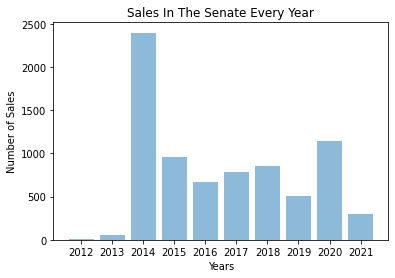

In [13]:
# Length of years array
y_pos = np.arange(len(years))

# initilize our graph
plt.bar(y_pos, countSales, align='center', alpha=0.5)

# set the x-axis values
plt.xticks(y_pos, years)

# set the x-title
plt.xlabel('Years')

# set the y-title
plt.ylabel('Number of Sales')

# set the title
plt.title('Sales In The Senate Every Year')

plt.show()

Calculate the number of transactions that are Purchases 

In [4]:
# Intialize array for number of purchases per month
countBuys = []

# Filter out the dataframe for all purchases 
dfPurchases = df[df['Type'] == 'Purchase']

# iterate through the number of years
for year in years:
    # filter dataframe to only include that year  and count it
    countOfYear = dfPurchases[dfPurchases['Transaction Date'].str[-4:] == year].count()
    
    # append the count to array
    countBuys.append(countOfYear['Transaction Date'])


Graph the Purchases in the Senate on a Yearly Basis

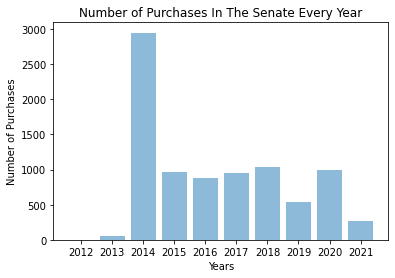

In [5]:
# Graph Purcahses for Senators

# Length of years array
y_pos = np.arange(len(years))

# initilize our graph
plt.bar(y_pos, countBuys, align='center', alpha=0.5)

# set the x-axis values
plt.xticks(y_pos, years)

# set the x-title
plt.xlabel('Years')

# set the y-title
plt.ylabel('Number of Purchases')

# set the title
plt.title('Number of Purchases In The Senate Every Year')

plt.show()

Compare the number of purchases and sales in the senate on a yearly basis

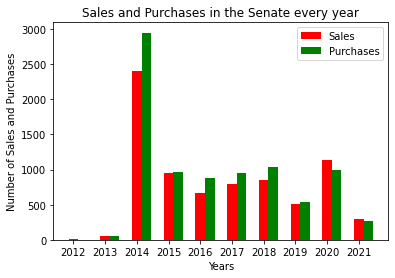

In [6]:
# Bar graph with both sales and buys
# initilize our graph
width = 0.3       
plt.bar(y_pos, countSales, width, color = 'red', label='Number of Sales')
plt.bar(y_pos+width, countBuys, width, color = 'green', label='Number of purchases')
plt.xticks(y_pos, years)
plt.title('Sales and Purchases in the Senate every year')
plt.xlabel('Years')
plt.ylabel('Number of Sales and Purchases')
plt.legend(['Sales', 'Purchases'])

plt.show()

Graph Total Transactions (Purchases & Sales) by year

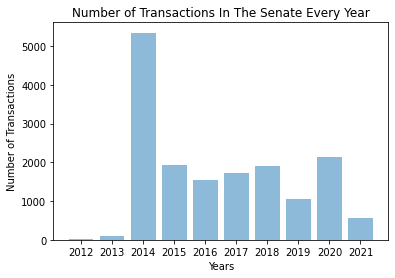

In [7]:
y_pos = np.arange(len(years))

countTransactions = []
for i in range(len(countSales)):
    countTransactions.append(countSales[i] + countBuys[i])

# initilize our graph
plt.bar(y_pos, countTransactions, align='center', alpha=0.5)

# set the x-axis values
plt.xticks(y_pos, years)

# set the x-title
plt.xlabel('Years')

# set the y-title
plt.ylabel('Number of Transactions')

# set the title
plt.title('Number of Transactions In The Senate Every Year')

plt.show()

Total Trade Volume of a Specific Senator

In [16]:
def totalTradeVolumeSS(name):
    dfTransactions = df[df['Name'] == name]

    amounts = dfTransactions['Amount'].value_counts()
    listOfAmounts = [
        ["$1,001 - $15,000", (1001, 15000)],
        ["$15,001 - $50,000", (15001, 50000)],
        ["$50,001 - $100,000", (50001, 100000)],
        ["$100,001 - $250,000", (100001, 250000)],
        ["$250,001 - $500,000", (250001, 500000)],
        ["$500,001 - $1,000,000", (500001, 1000000)],
        ["$1,000,001 - $5,000,000", (1000001, 5000000)],
        ["$5,000,001 - $25,000,000", (5000001, 25000000)],
        ["$25,000,001 - $50,000,000", (25000001, 50000000)],
        ["Over $50,000,000", (50000000, 50000000)],
    ]
    

    sumMin = 0
    sumMax = 0
    sumMid = 0 

    #iterate through the amount of each transaction 
    for i in range(len(amounts.index)):
        # iterate through the 
        for j in range(len(listOfAmounts)):
            if amounts.index[i] == listOfAmounts[j][0]:
                sumMin += listOfAmounts[j][1][0] * amounts.values[i]
                sumMax += listOfAmounts[j][1][1] * amounts.values[i]
    
    sumMid += (sumMax + sumMin) / 2

    return sumMin, sumMax, sumMid


minTradeVolume, maxTradeVolume, aveargeTradeVolume = totalTradeVolumeSS('Hoeven, John (Senator)')
# averageTradeVolume:, adds a thousands seperate to make the number more readable
print(f"~${aveargeTradeVolume:,}")

~$54,178,112.5


Total Trade Volume of the entire senate on a yearly basis

In [23]:
def totalTradeVolumeSenate(year):
    dfTransactions = df[df['Transaction Date'].str[-4:] == year]

    amounts = dfTransactions['Amount'].value_counts()
    listOfAmounts = [
        ["$1,001 - $15,000", (1001, 15000)],
        ["$15,001 - $50,000", (15001, 50000)],
        ["$50,001 - $100,000", (50001, 100000)],
        ["$100,001 - $250,000", (100001, 250000)],
        ["$250,001 - $500,000", (250001, 500000)],
        ["$500,001 - $1,000,000", (500001, 1000000)],
        ["$1,000,001 - $5,000,000", (1000001, 5000000)],
        ["$5,000,001 - $25,000,000", (5000001, 25000000)],
        ["$25,000,001 - $50,000,000", (25000001, 50000000)],
        ["Over $50,000,000", (50000000, 50000000)],
    ]
    

    sumMin = 0
    sumMax = 0
    sumMid = 0 

    #iterate through the amount of each transaction 
    for i in range(len(amounts.index)):
        # iterate through the 
        for j in range(len(listOfAmounts)):
            if amounts.index[i] == listOfAmounts[j][0]:
                sumMin += listOfAmounts[j][1][0] * amounts.values[i]
                sumMax += listOfAmounts[j][1][1] * amounts.values[i]
    
    sumMid += (sumMax + sumMin) / 2

    return sumMin, sumMax, sumMid

# Testing function
minTradeVolume, maxTradeVolume, aveargeTradeVolume = totalTradeVolumeSenate('2021')
# averageTradeVolume:, adds a thousands seperate to make the number more readable
print(f"~${aveargeTradeVolume:,}")

~$92,119,284.5


Graph the total trade volume over the years

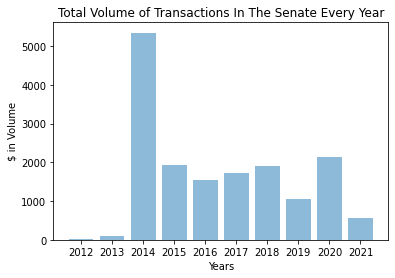

In [22]:
y_pos = np.arange(len(years))

tradeVolume = []
for i in range(len(years)):
    tradeVolume.append(totalTradeVolumeSenate(years[i]))

# initilize our graph
plt.bar(y_pos, countTransactions, align='center', alpha=0.5)

# set the x-axis values
plt.xticks(y_pos, years)

# set the x-title
plt.xlabel('Years')

# set the y-title
plt.ylabel('$ in Volume')

# set the title
plt.title('Total Volume of Transactions In The Senate Every Year')

plt.show()

Ticker traded by volume

In [9]:
def tickerTradedbyVolumeSS(name):
    # creat e a dictionary to keep track of ticker name, volume, and occurences 
    tickerDict = {}
    # filter out the main df by senator name
    dfTransactions = df[df['Name'] == name]
    # get the total trade volume, max min and estimate
    volumeMin, volumeMax, volumeMid = totalTradeVolumeSS(name)
    # iterate through the dataframe
    for i in range(len(dfTransactions)):
        #keep track of how many transactions we have with that ticker
        occorrences = 0
        # keep track of the volume of that ticker
        volumePerTicker = 0
        # get the ticker name
        tickerName = dfTransactions.iloc[i]['Ticker'][0]
        if tickerName == "-" or tickerName == "--":
            tickerName = "Other Assets"

        # create a dictionary to keep track of possible trade volumes
        listOfAmounts = [
        ["$1,001 - $15,000", (1001, 15000)],
        ["$15,001 - $50,000", (15001, 50000)],
        ["$50,001 - $100,000", (50001, 100000)],
        ["$100,001 - $250,000", (100001, 250000)],
        ["$250,001 - $500,000", (250001, 500000)],
        ["$500,001 - $1,000,000", (500001, 1000000)],
        ["$1,000,001 - $5,000,000", (1000001, 5000000)],
        ["$5,000,001 - $25,000,000", (5000001, 25000000)],
        ["$25,000,001 - $50,000,000", (25000001, 50000000)],
        ["Over $50,000,000", (50000000, 50000000)],
        ]
        # get the volume of that ticker
        volumePerTicker = dfTransactions.iloc[i]['Amount']
        # iterate through the possible ticker amounts
        for i in range(len(listOfAmounts)):
            # if there is a match 
            if volumePerTicker == listOfAmounts[i][0]:
                    # estimate the volume of that ticker
                    esitimatedVolume = (listOfAmounts[i][1][1] + listOfAmounts[i][1][0]) / 2

        # if the ticker does not already exist in the dictionary add it
        if tickerName not in tickerDict:
            tickerDict[tickerName] = [0, 0, 0]
        # add the volume of the ticker to the total volume
        tickerDict[tickerName][0] += esitimatedVolume
        # increment the number of transactions with that ticker
        tickerDict[tickerName][1] += 1
        # % of ticker from total volume = (volume of ticker / total volume) * 100
        percentageVolume = (tickerDict[tickerName][0] / volumeMid) * 100
        tickerDict[tickerName][2] = percentageVolume

    return tickerDict
    

dict = tickerTradedbyVolumeSS('Hoeven, John (Senator)')   
# turn dictionary into dataframe 
dfSSTickerVolume = pd.DataFrame.from_dict(dict, orient='index')
dfSSTickerVolume= dfSSTickerVolume.rename(columns = {2: 'Percentage of Stock Volume'})
dfSSTickerVolume= dfSSTickerVolume.rename(columns = {1: 'Number of occurances'})
dfSSTickerVolume= dfSSTickerVolume.rename(columns = {0: 'Estimated Volume'})
# sort the dataframe by the percentage of stock volume
dfSSTickerVolume = dfSSTickerVolume.sort_values(by=['Percentage of Stock Volume'], ascending=False)
# pie chart the data frame
# dfSSTickerVolume.plot.pie(y='Percentage of Stock Volume', figsize=(20,20), autopct="%.2f",  shadow=True, startangle=90 ,title="Percentage of Stock Volume Traded by Ticker")
# plt.legend(loc='lower left')
# plt.ylabel('')

dfSSTickerVolume.style


,Estimated Volume,Number of occurances,Percentage of Stock Volume
Other Assets,33522515.500000,31,61.874646
WLTW,1069507.000000,14,1.974057
ABBV,675002.500000,5,1.245895
F,600002.000000,4,1.107462
KHC,550001.000000,2,1.015172
MDU,525001.500000,3,0.969029
BX,525001.500000,3,0.969029
SPG,525001.500000,3,0.969029
IBM,507503.000000,6,0.936731
CAT,500002.000000,4,0.922886


Type of assets bought

Stock               181
                     27
Non-Public Stock     12
Other Securities      5
Name: Asset Type, dtype: int64


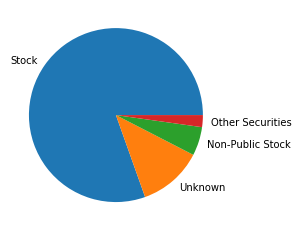

In [10]:
# get all transactions of congress person
def popularAssetsOfTransactions(name):
    dfTransactions = df[df['Name'] == name]

    executors = dfTransactions['Asset Type'].value_counts()

    print(executors)

    cols = []
    for col in executors.index:
        if col == "":
            cols.append("Unknown")
        else:
            cols.append(col)

    rows = executors.values

    yAxis = np.array(rows)
    
    plt.pie(yAxis, labels=cols)
    plt.show()




popularAssetsOfTransactions('Hoeven, John (Senator)')

Executor of transactions

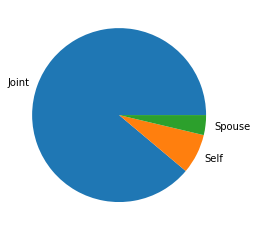

In [11]:
# get all transactions of congress person
def executorOfTransactions(name):
    dfTransactions = df[df['Name'] == name]

    executors = dfTransactions['Owner'].value_counts()

    cols = executors.index
    rows = executors.values

    yAxis = np.array(rows)
    
    plt.pie(yAxis, labels=cols)
    plt.show()




executorOfTransactions('Sullivan, Dan (Senator)')

Sector in which they are buying into

In [12]:
import yfinance as yf
def sectorTradesSS(name):
    dfTransactions = df[df['Name'] == name]
    sectorsDict = {}
    volumeMin, volumeMax, volumeMid = totalTradeVolumeSS(name)
    # iterate through the dataframe
    for i in range(len(dfTransactions)):
        # keep track of the volume of that sector
        volumePerTicker = 0
        # keep track of occurences of that sector
        occorrences = 0
        # get the ticker name
        tickerName = dfTransactions.iloc[i]['Ticker'][0]
        if tickerName == "-" or tickerName == "--":
            tickerName = "Other Assets"

        # create a dictionary to keep track of possible trade volumes
        listOfAmounts = [
        ["$1,001 - $15,000", (1001, 15000)],
        ["$15,001 - $50,000", (15001, 50000)],
        ["$50,001 - $100,000", (50001, 100000)],
        ["$100,001 - $250,000", (100001, 250000)],
        ["$250,001 - $500,000", (250001, 500000)],
        ["$500,001 - $1,000,000", (500001, 1000000)],
        ["$1,000,001 - $5,000,000", (1000001, 5000000)],
        ["$5,000,001 - $25,000,000", (5000001, 25000000)],
        ["$25,000,001 - $50,000,000", (25000001, 50000000)],
        ["Over $50,000,000", (50000000, 50000000)],
        ]
        # get the volume of that ticker
        volumePerTicker = dfTransactions.iloc[i]['Amount']
        # iterate through the possible ticker amounts
        for i in range(len(listOfAmounts)):
            # if there is a match 
            if volumePerTicker == listOfAmounts[i][0]:
                    # estimate the volume of that ticker
                    esitimatedVolume = (listOfAmounts[i][1][1] + listOfAmounts[i][1][0]) / 2
        data = yf.Ticker(tickerName)
        try: 
            sector = data.info['sector']
        except:
            sector = "Unknown"

        if sector not in sectorsDict:
            sectorsDict[sector] = [0, 0]

        sectorsDict[sector][0] += esitimatedVolume
        sectorsDict[sector][1] += 1

    return sectorsDict
    
dict = sectorTradesSS('Hickenlooper, John (Senator)')   
# turn dictionary into dataframe 
dfSSTickerVolume = pd.DataFrame.from_dict(dict, orient='index')
dfSSTickerVolume= dfSSTickerVolume.rename(columns = {1: 'Occurences'})
dfSSTickerVolume= dfSSTickerVolume.rename(columns = {0: 'Volume within sector'})
df.index.name = "Sector"

# sort the dataframe by the volume
dfSSTickerVolume = dfSSTickerVolume.sort_values(by=['Volume within sector'], ascending=False)
# style the dataframe
dfSSTickerVolume.style

,Volume within sector,Occurences
Technology,1573003.000000,6
Communication Services,823002.500000,5
Consumer Cyclical,733002.000000,4
Financial Services,450001.000000,2
Energy,175000.500000,1
Healthcare,16001.000000,2
Unknown,8000.500000,1


Top 10 stocks purchased by the senate

Top 10 stocks sold by the senate

Sectors in which the senate are buying into

In [21]:
def sectorTradesInSenate(year):
    dfTransactions = df[df['Transaction Date'].str[-4:] == year]
    sectorsDict = {}
    volumeMin, volumeMax, volumeMid = totalTradeVolumeSenate(year)
    # iterate through the dataframe
    print(len(dfTransactions))
    for i in range(len(dfTransactions)):
        print(i)
        # keep track of the volume of that sector
        volumePerTicker = 0
        # keep track of occurences of that sector
        occorrences = 0
        # get the ticker name
        tickerName = dfTransactions.iloc[i]['Ticker'][0]
        if tickerName == "-" or tickerName == "--":
            tickerName = "Other Assets"

        # create a dictionary to keep track of possible trade volumes
        listOfAmounts = [
        ["$1,001 - $15,000", (1001, 15000)],
        ["$15,001 - $50,000", (15001, 50000)],
        ["$50,001 - $100,000", (50001, 100000)],
        ["$100,001 - $250,000", (100001, 250000)],
        ["$250,001 - $500,000", (250001, 500000)],
        ["$500,001 - $1,000,000", (500001, 1000000)],
        ["$1,000,001 - $5,000,000", (1000001, 5000000)],
        ["$5,000,001 - $25,000,000", (5000001, 25000000)],
        ["$25,000,001 - $50,000,000", (25000001, 50000000)],
        ["Over $50,000,000", (50000000, 50000000)],
        ]
        # get the volume of that ticker
        volumePerTicker = dfTransactions.iloc[i]['Amount']
        # iterate through the possible ticker amounts
        for i in range(len(listOfAmounts)):
            # if there is a match 
            if volumePerTicker == listOfAmounts[i][0]:
                    # estimate the volume of that ticker
                    esitimatedVolume = (listOfAmounts[i][1][1] + listOfAmounts[i][1][0]) / 2
        data = yf.Ticker(tickerName)
        try: 
            sector = data.info['sector']
        except:
            sector = "Unknown"

        if sector not in sectorsDict:
            sectorsDict[sector] = [0, 0]

        sectorsDict[sector][0] += esitimatedVolume
        sectorsDict[sector][1] += 1

    return sectorsDict


dictTemp = sectorTradesInSenate('2021')   
# turn dictionary into dataframe 
dfSSTickerVolume = pd.DataFrame.from_dict(dict, orient='index')
dfSSTickerVolume= dfSSTickerVolume.rename(columns = {1: 'Occurences'})
dfSSTickerVolume= dfSSTickerVolume.rename(columns = {0: 'Volume within sector'})
df.index.name = "Sector"

# sort the dataframe by the volume
dfSSTickerVolume = dfSSTickerVolume.sort_values(by=['Volume within sector'], ascending=False)
# style the dataframe
dfSSTickerVolume.style

569
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

,Volume within sector,Occurences
Technology,1573003.000000,6
Communication Services,823002.500000,5
Consumer Cyclical,733002.000000,4
Financial Services,450001.000000,2
Energy,175000.500000,1
Healthcare,16001.000000,2
Unknown,8000.500000,1
